# 18CE032 - Jariwala Ankur

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
admission_df = pd.read_csv('Admission_Predict.csv')

In [3]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admission_df.drop('Serial No.',axis=1,inplace=True)
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# **PERFORM EXPLOARTORY DATA ANALYSIS**

In [5]:
 admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [7]:
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
df_university = admission_df.groupby(by='University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


# **PERFORM DATA VISUALIZATION**

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>,
        <AxesSubplot:>]], dtype=object)

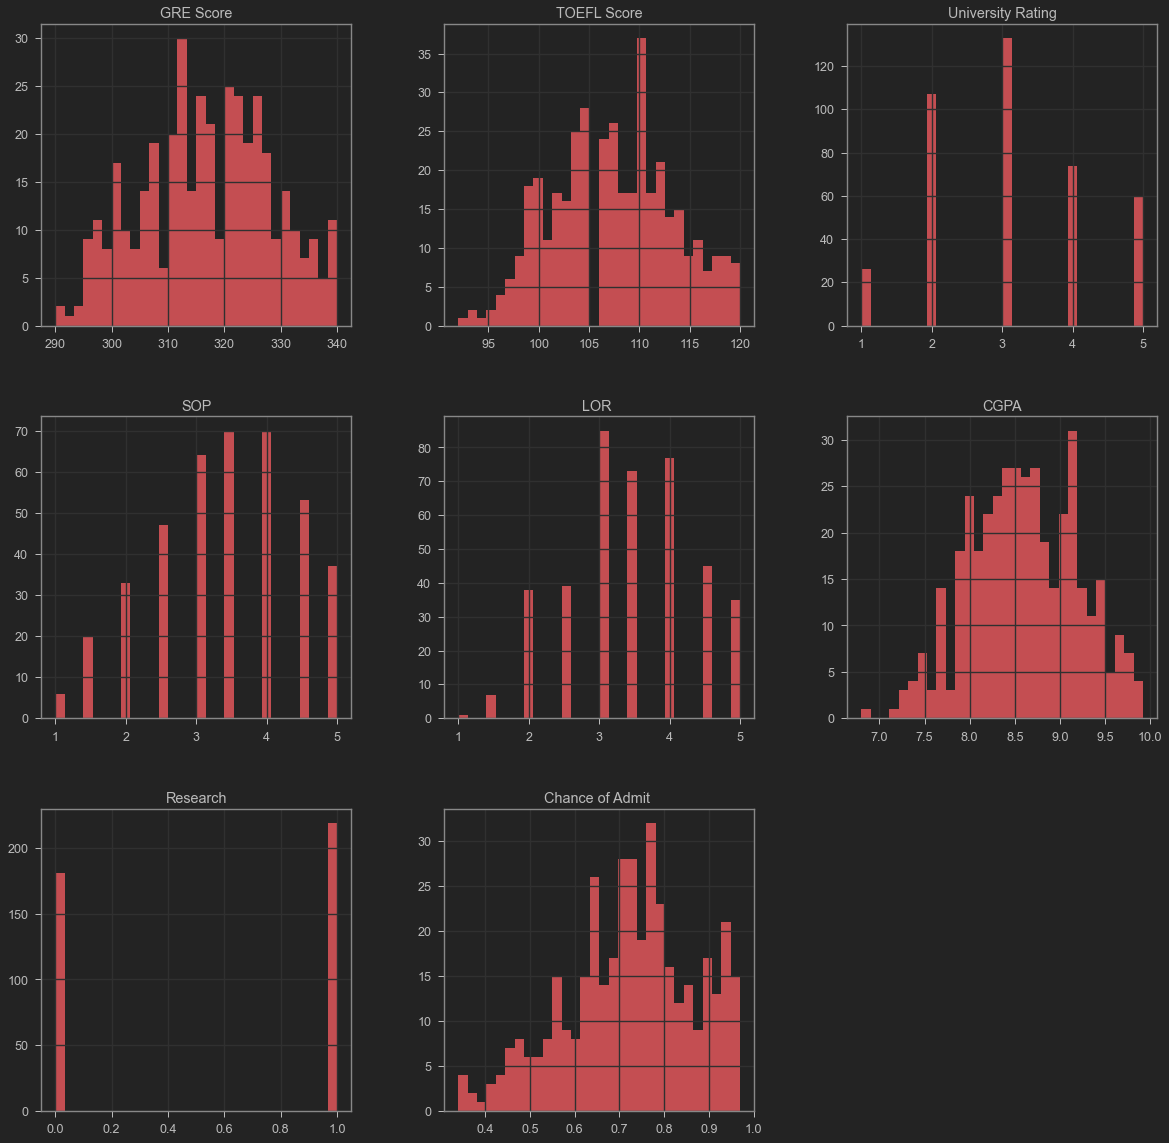

In [13]:
admission_df.hist(bins=30, figsize=(20,20), color='r')

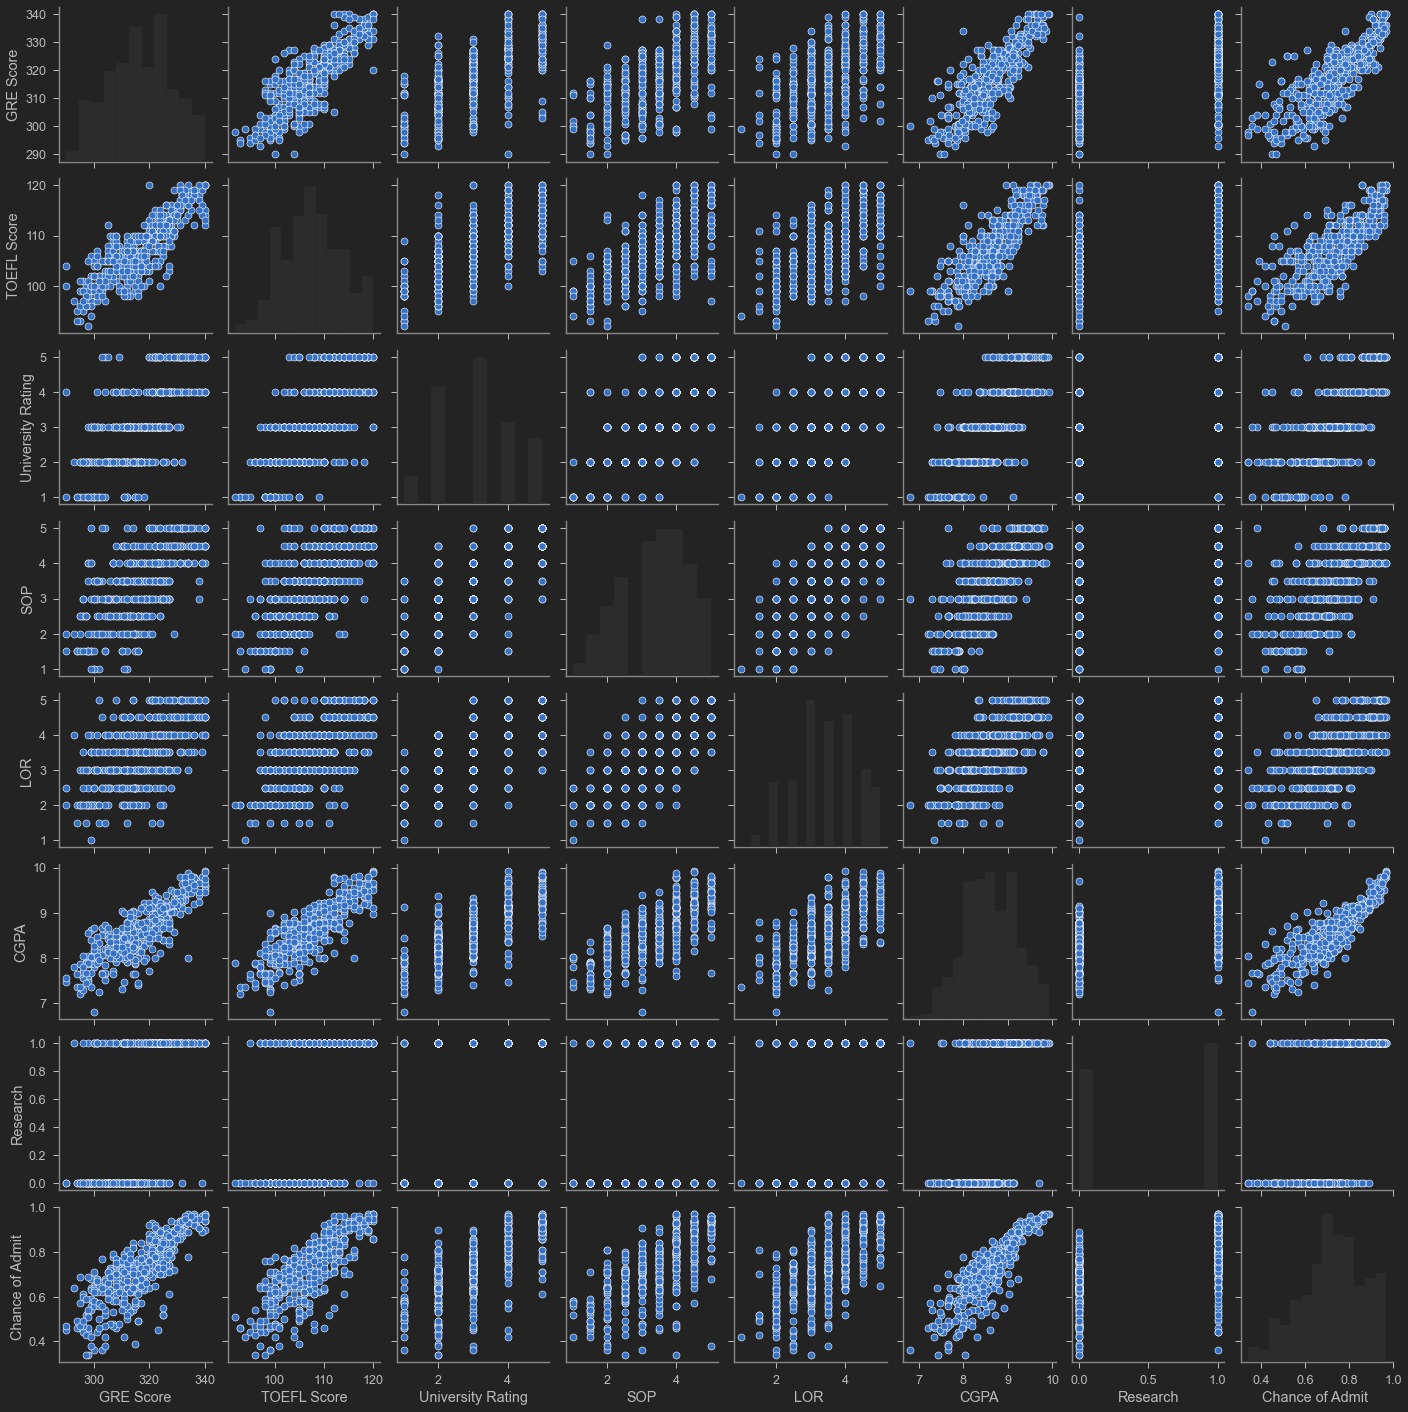

In [18]:
sns.pairplot(admission_df)

<AxesSubplot:>

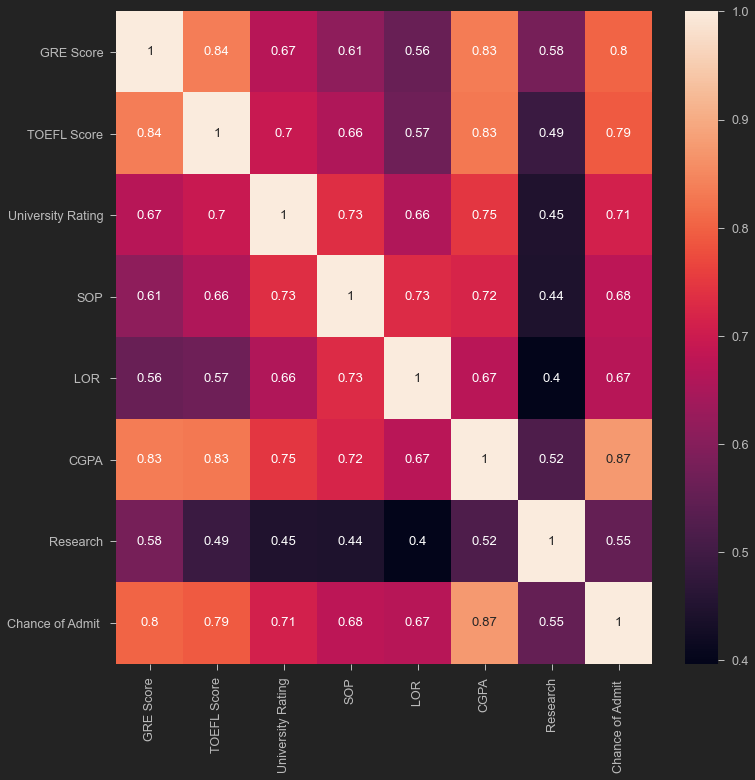

In [20]:
corr_matrix = admission_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True)

# **CREATE TRAINING AND TESTING DATASET**

In [9]:
X = admission_df.drop(columns=['Chance of Admit '])

In [10]:
y = admission_df['Chance of Admit ']

In [11]:
X.shape

(400, 7)

In [12]:
y.shape

(400,)

In [13]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [14]:
X = np.array(X)
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(400, 1)

**StandardScaler**

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

print(X.mean(axis = 0))
print(X.std(axis = 0))

[-4.17443857e-16  5.59552404e-16  7.10542736e-17  7.99360578e-17
 -1.33226763e-16  7.77156117e-16 -3.99680289e-17]
[1. 1. 1. 1. 1. 1. 1.]


In [16]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

print(y.mean(axis = 0))
print(y.std(axis = 0))

[-3.37507799e-16]
[1.]


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [19]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train,y_train)

LinearRegression()

In [20]:
accuracy_LinearRegression = LinearRegression_model.score(X_test,y_test)
accuracy_LinearRegression

0.8334359102633924

**MinMaxScaler**

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = MinMaxScaler()
X = scaler_x.fit_transform(X)

print(X.mean(axis = 0))
print(X.std(axis = 0))

[0.53615    0.55035714 0.521875   0.6        0.613125   0.57657853
 0.5475    ]
[0.2291859  0.21649722 0.28557439 0.25140232 0.22433844 0.19088822
 0.49773864]


In [48]:
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y)

print(y.mean(axis = 0))
print(y.std(axis = 0))

[0.61007937]
[0.22608088]


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [52]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train,y_train)

LinearRegression()

In [53]:
accuracy_LinearRegression = LinearRegression_model.score(X_test,y_test)
accuracy_LinearRegression

0.7552355904741141

**We get More Accuracy in StandardScaler than that in MinMaxScaler.**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [22]:
pred = LinearRegression_model.predict(X_test)

In [23]:
print('MAE (mean absolute error): ',mean_absolute_error(y_test, pred))
print('MSE (mean squared error): ',mean_squared_error(y_test,pred))
print('RMSE (root mean squared error): ',(mean_squared_error(y_test,pred))**0.5)
print('R^2: ',r2_score(y_test,pred))
print('Adjust R^2: ', 1-((400-1)/(400-7-1)*(1-r2_score(y_test,pred)))) # here n=400 and k=7

MAE (mean absolute error):  0.267888078837442
MSE (mean squared error):  0.1464441690513319
RMSE (root mean squared error):  0.38268024387382726
R^2:  0.8334359102633924
Adjust R^2:  0.8304615515180958


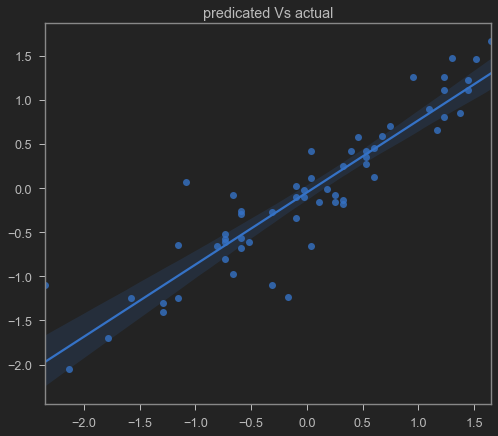

In [24]:
sns.regplot(x=y_test,y=pred)
plt.title('predicated Vs actual')
plt.show()

# Test1

In [40]:
print('Chance of getting admission is : {} %'.format((LinearRegression_model.predict([[350,100,5,4.5,4.5,8.00,0]]))))

Chance of getting admission is : [[69.34914093]] %


# Test2

In [40]:
print('Chance of getting admission is : {} %'.format((LinearRegression_model.predict([[1,100,5,4.5,4.5,8.00,0]]))))

Chance of getting admission is : [[69.34914093]] %
